In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Cargamos Datos 


In [2]:
#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']

items = pd.read_csv('BX_Books.csv',  sep=';', names=i_cols, encoding='latin-1',low_memory=False,skiprows= 1)

#Books Rating

r_cols = ['user_id', 'isbn', 'rating']

ratings = pd.read_csv('BX-Book-Ratings.csv', names=r_cols, skiprows= 1, low_memory=False, encoding='latin-1', sep=';')


#Users

u_cols = ['user_id', 'user_location', 'user_age']

users = pd.read_csv('BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False, skiprows= 1)


In [ ]:
user_complite=pd.merge(users,ratings,on='user_id', how = 'inner')
user_complite = user_complite[['isbn','user_location', 'user_age']]
book_complite = pd.merge(items,user_complite, on ='isbn', how ='inner')

In [3]:
items.head(2)


,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [4]:
ratings.head(7)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8


In [5]:
users.head(2)

,user_id,user_location,user_age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  int64 
 4   publisher            271377 non-null  object
 5   img_s                271379 non-null  object
 6   img_m                271379 non-null  object
 7   img_l                271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [7]:
len(items['isbn'].unique())

271379

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   isbn     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
len(ratings['user_id'].unique())

105283

In [10]:
len(ratings['isbn'].unique())

340556

In [11]:
len(ratings[ratings['rating']== 0])

716109

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        278858 non-null  int64  
 1   user_location  278858 non-null  object 
 2   user_age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Join de datos

La idea es juntar los datos para comprobar su veracidad en los diferentes dataset.

In [13]:
# Hacemos el primer merge entre rating, y users, así tenemos toda la info de los usuarios en un solo dataframe.

user_rating=pd.merge(users,ratings,on='user_id', how = 'inner')

In [14]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1149780 non-null  int64  
 1   user_location  1149780 non-null  object 
 2   user_age       840288 non-null   float64
 3   isbn           1149780 non-null  object 
 4   rating         1149780 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 52.6+ MB


In [22]:
#Aqui vamos a juntar el dataframe que nos queda , con esto obtendremos un df con las puntuaciones de los libros que tenemos información especifica de ella.

In [15]:
left = items[['isbn', 'book_title', 'book_author','year_of_publication','publisher']]

books = pd.merge(left, user_rating,how='inner', on=['isbn'])

In [16]:
books.head(2)

,isbn,book_title,book_author,year_of_publication,publisher,user_id,user_location,user_age,rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",NaN,5


In [17]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031175 entries, 0 to 1031174
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   isbn                 1031175 non-null  object 
 1   book_title           1031175 non-null  object 
 2   book_author          1031174 non-null  object 
 3   year_of_publication  1031175 non-null  int64  
 4   publisher            1031173 non-null  object 
 5   user_id              1031175 non-null  int64  
 6   user_location        1031175 non-null  object 
 7   user_age             753330 non-null   float64
 8   rating               1031175 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 78.7+ MB


In [163]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
clrs = 'rgb(157,205,249)'

data =ratings['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker=dict(color=clrs)
               )
# Create layout
layout = dict(title = 'Distribution Of {} book-ratings'.format(ratings.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [164]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
clrs = 'rgb(157,205,249)'
data =books['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / books.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker=dict(color=clrs)
               )
# Create layout
layout = dict(title = 'Distribución de {} ratings'.format(books.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [22]:
len(books['user_id'].unique())

92107

In [23]:
len(books['isbn'].unique())

270170

In [24]:
books.shape

(1031175, 9)

In [25]:
books.describe(include='all')

,isbn,book_title,book_author,year_of_publication,publisher,user_id,user_location,user_age,rating
count,1031175,1031175,1031174,1.031175e+06,1031173,1.031175e+06,1031175,753330.000000,1.031175e+06
unique,270170,241090,101593,NaN,16728,NaN,22480,NaN,NaN
top,0971880107,Wild Animus,Stephen King,NaN,Ballantine Books,NaN,"toronto, ontario, canada",NaN,NaN
freq,2502,2502,10053,NaN,34724,NaN,14782,NaN,NaN
mean,NaN,NaN,NaN,1.968194e+03,NaN,1.405944e+05,NaN,37.397719,2.839022e+00
std,NaN,NaN,NaN,2.311048e+02,NaN,8.052444e+04,NaN,14.098189,3.854149e+00
min,NaN,NaN,NaN,0.000000e+00,NaN,2.000000e+00,NaN,0.000000,0.000000e+00
25%,NaN,NaN,NaN,1.992000e+03,NaN,7.041500e+04,NaN,28.000000,0.000000e+00
50%,NaN,NaN,NaN,1.997000e+03,NaN,1.412100e+05,NaN,35.000000,0.000000e+00
75%,NaN,NaN,NaN,2.001000e+03,NaN,2.114260e+05,NaN,45.000000,7.000000e+00


## Vamos a tratar los missing values 

In [26]:
books.isnull().sum()

isbn                        0
book_title                  0
book_author                 1
year_of_publication         0
publisher                   2
user_id                     0
user_location               0
user_age               277845
rating                      0
dtype: int64

In [27]:
#Como hemos observado que tenemos demasiados null en la edad, vamos a eliminar esta feature.
books.drop(['user_age'],1,inplace = True)

In [28]:
books.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
user_id                0
user_location          0
rating                 0
dtype: int64

In [29]:
# Eliminamos las dos filas en las que faltan datos
books.dropna(inplace=True)

In [30]:
books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
user_id                0
user_location          0
rating                 0
dtype: int64

In [31]:
#Ahora tenemos nuestro dataframe sin nulls y no hemos perdido mucha información.
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031172 entries, 0 to 1031174
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   isbn                 1031172 non-null  object
 1   book_title           1031172 non-null  object
 2   book_author          1031172 non-null  object
 3   year_of_publication  1031172 non-null  int64 
 4   publisher            1031172 non-null  object
 5   user_id              1031172 non-null  int64 
 6   user_location        1031172 non-null  object
 7   rating               1031172 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 70.8+ MB


### Vamos a retocar los datatypes necesarios

In [32]:
#Vamos a dividir la columna de localización
location = books.user_location.str.split(', ', n=2, expand=True)

books['city'] = location[0]
books['state'] = location[1]
books['country'] = location[2]

In [33]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031172 entries, 0 to 1031174
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   isbn                 1031172 non-null  object
 1   book_title           1031172 non-null  object
 2   book_author          1031172 non-null  object
 3   year_of_publication  1031172 non-null  int64 
 4   publisher            1031172 non-null  object
 5   user_id              1031172 non-null  int64 
 6   user_location        1031172 non-null  object
 7   rating               1031172 non-null  int64 
 8   city                 1031172 non-null  object
 9   state                1031172 non-null  object
 10  country              1006975 non-null  object
dtypes: int64(3), object(8)
memory usage: 94.4+ MB


In [34]:
#Observamos que tenemos bastantes valores null en country.
books.isnull().sum()

isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
user_id                    0
user_location              0
rating                     0
city                       0
state                      0
country                24197
dtype: int64

In [35]:
# Eliminamos la columna de country,nos es mas importante consevar otras features como son los rating
books.drop(['country'],1,inplace= True)

In [36]:
books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
user_id                0
user_location          0
rating                 0
city                   0
state                  0
dtype: int64

In [37]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031172 entries, 0 to 1031174
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   isbn                 1031172 non-null  object
 1   book_title           1031172 non-null  object
 2   book_author          1031172 non-null  object
 3   year_of_publication  1031172 non-null  int64 
 4   publisher            1031172 non-null  object
 5   user_id              1031172 non-null  int64 
 6   user_location        1031172 non-null  object
 7   rating               1031172 non-null  int64 
 8   city                 1031172 non-null  object
 9   state                1031172 non-null  object
dtypes: int64(3), object(7)
memory usage: 86.5+ MB


## Limpieza de los datos

In [167]:
quality_ratings = books[books['rating']!=0]
#quality_book = quality_ratings['isbn'].value_counts().rename_axis('isbn').reset_index(name = 'Count')
#quality_book = quality_book[quality_book['Count']>5]['isbn'].to_list()
quality_ratings = quality_ratings[quality_ratings['isbn'].isin(quality_book)]
quality_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176948 entries, 1 to 1001767
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 176948 non-null  object
 1   book_title           176948 non-null  object
 2   book_author          176948 non-null  object
 3   year_of_publication  176948 non-null  int64 
 4   publisher            176948 non-null  object
 5   user_id              176948 non-null  int64 
 6   user_location        176948 non-null  object
 7   rating               176948 non-null  int64 
 8   city                 176948 non-null  object
 9   state                176948 non-null  object
dtypes: int64(3), object(7)
memory usage: 14.9+ MB


In [168]:
quality_user = quality_ratings['user_id'].value_counts().rename_axis('user_id').reset_index(name = 'Count')
quality_user = quality_user[quality_user['Count']>5]['user_id'].to_list()
quality_ratings = quality_ratings[quality_ratings['user_id'].isin(quality_user)]
quality_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114147 entries, 3 to 1001762
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 114147 non-null  object
 1   book_title           114147 non-null  object
 2   book_author          114147 non-null  object
 3   year_of_publication  114147 non-null  int64 
 4   publisher            114147 non-null  object
 5   user_id              114147 non-null  int64 
 6   user_location        114147 non-null  object
 7   rating               114147 non-null  int64 
 8   city                 114147 non-null  object
 9   state                114147 non-null  object
dtypes: int64(3), object(7)
memory usage: 9.6+ MB


In [166]:
len(quality_ratings['user_id'].unique())

5911

# Data Visualization 

### Rating Distribution 

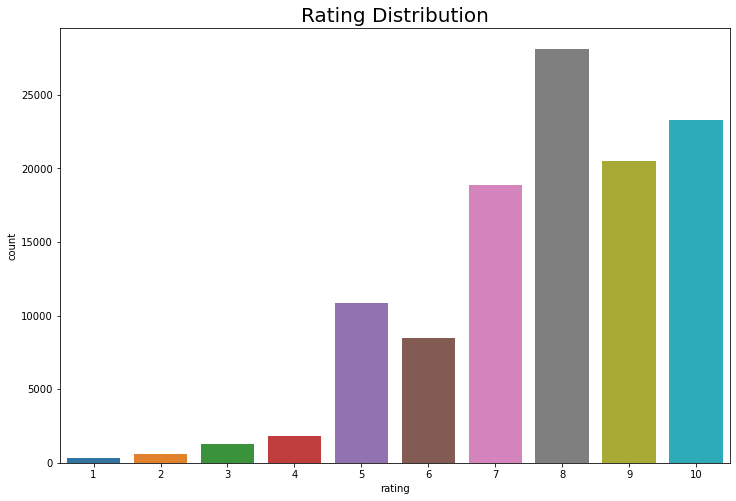

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=quality_ratings)
plt.title('Rating Distribution',size=20);

In [169]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

clrs = 'rgb(157,205,249)'
data =quality_ratings['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / quality_ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker=dict(color=clrs)
               )
# Create layout
layout = dict(title = 'Distribution Of {} book-ratings'.format(quality_ratings.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [170]:
# Number of ratings per book
data = quality_ratings.groupby('isbn')['rating'].count().clip(upper=50)

clrs = 'rgb(157,205,249)'
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2),
                     marker=dict(color=clrs))

# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Book',
                   xaxis = dict(title = 'Number of Ratings Per Book'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [171]:
# Number of ratings per user
data = quality_ratings.groupby('user_id')['rating'].count().clip(upper=50)
clrs = 'rgb(157,205,249)'
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2),
                    marker=dict(color=clrs))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Authors with most Ratings

In [50]:
ds=quality_ratings['book_author'].value_counts().head(50).reset_index()
ds.columns=['author','count']
ds.head()

,author,count
0,Stephen King,2937
1,Nora Roberts,2071
2,James Patterson,1507
3,John Grisham,1427
4,J. K. Rowling,1159


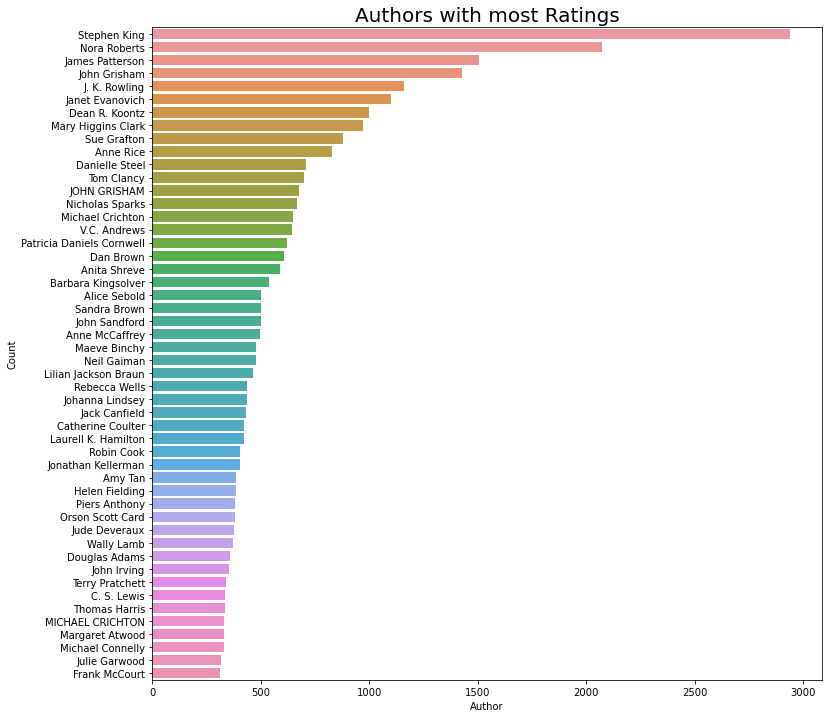

In [50]:
plt.figure(figsize=(12,12))
sns.barplot(x='count',y='author',data=ds)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Authors with most Ratings',size=20);

### Books with most Ratings

In [51]:
db=quality_ratings['book_title'].value_counts().head(50).reset_index()
db.columns=['book','count']
db.head()

,book,count
0,The Lovely Bones: A Novel,347
1,The Da Vinci Code,279
2,The Secret Life of Bees,244
3,Harry Potter and the Chamber of Secrets (Book 2),233
4,Bridget Jones's Diary,226


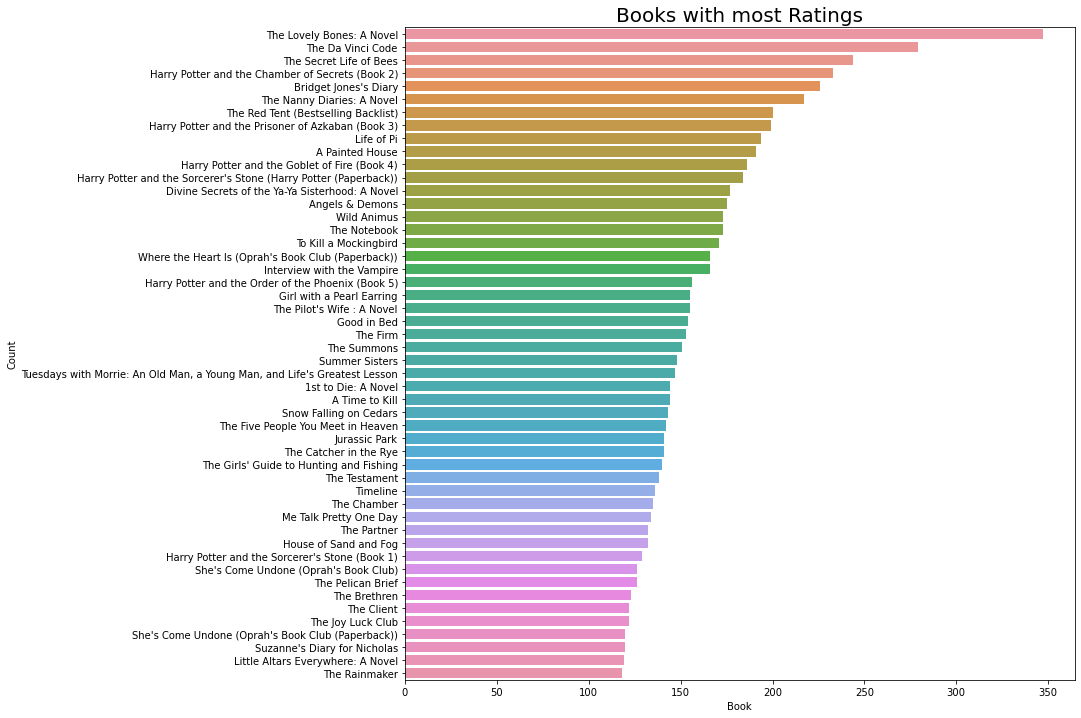

In [52]:
plt.figure(figsize=(12,12))
sns.barplot(x='count',y='book',data=db)
plt.xlabel('Book')
plt.ylabel('Count')
plt.title('Books with most Ratings',size=20);

## Wordclouds

In [53]:
from wordcloud import WordCloud,STOPWORDS
stop_words=set(STOPWORDS)


author_string = " ".join(quality_ratings['book_author'].astype(str)) # Estamos separando todo los autores por letras, espacios, putos. Todo de uno en uno valores independientes. 
title_string = " ".join(quality_ratings['book_title'].astype(str))
publisher_string = " ".join(quality_ratings['publisher'].astype(str))

## Wordcloud of Famous Authors

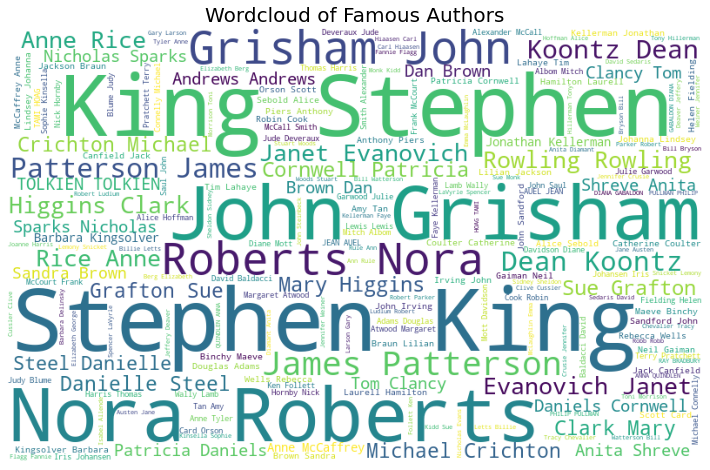

In [54]:
wc = WordCloud(width=800,height=500, max_font_size=100,stopwords=stop_words,background_color='white').generate(author_string)
fig=plt.figure(figsize=(16,8))
plt.axis('off')
plt.title('Wordcloud of Famous Authors',size=20)
plt.imshow(wc);

## Wordcloud of Most Rated Titles

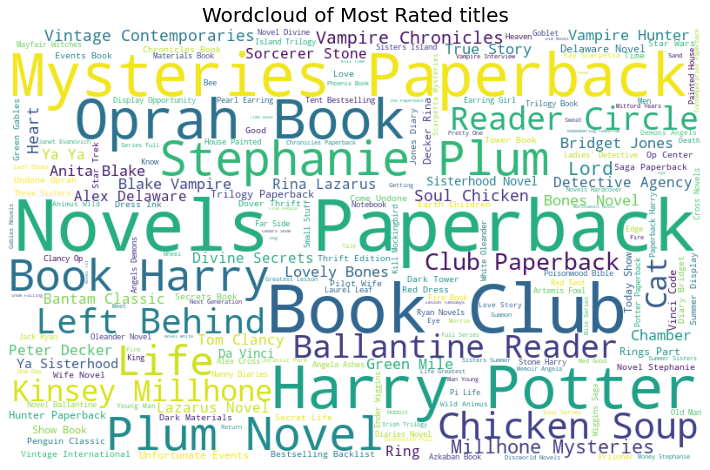

In [55]:
wc = WordCloud(width=800,height=500, max_font_size=100,stopwords=stop_words,background_color='white').generate(title_string)
fig=plt.figure(figsize=(16,8))
plt.axis('off')
plt.title('Wordcloud of Most Rated titles',size=20)
plt.imshow(wc);

## Wordcloud of Famous Publishers

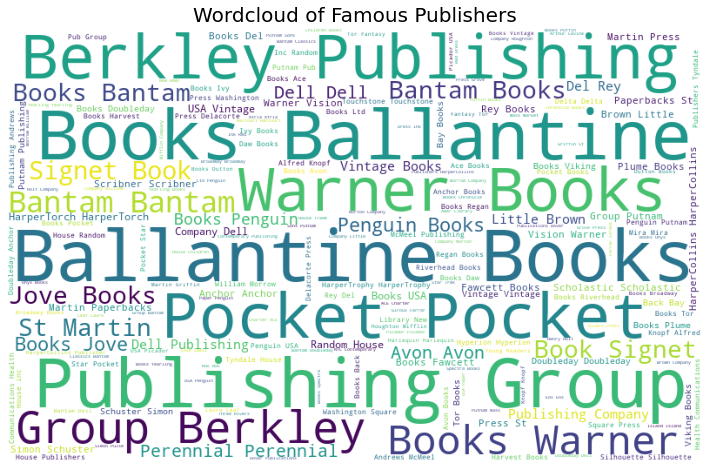

In [56]:
wc = WordCloud(width=800,height=500, max_font_size=100,stopwords=stop_words,background_color='white').generate(publisher_string)
fig=plt.figure(figsize=(16,8))
plt.axis('off')
plt.title('Wordcloud of Famous Publishers',size=20)
plt.imshow(wc);



# Recommender System 

In [81]:
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection.search import GridSearchCV
from surprise import NormalPredictor,KNNBasic,KNNWithMeans,KNNWithZScore,KNNBaseline,SVD,BaselineOnly,
SVDpp,NMF,SlopeOne,CoClustering,NMF
from surprise.accuracy import rmse
from surprise import accuracy

In [82]:
# Finalmete nos vamos a quedar con las columnas que necesitamos para realizar las predicciones.
data = quality_ratings[['user_id', 'isbn', 'rating']]

In [83]:

# Normalizamos  All ratings are normalized as gaussian distribution Gaussian Ratings are scaled on (0-5) Rating scale

mean_rating_user = data.groupby('user_id')['rating'].mean().reset_index(name='Mean-Rating-User')
mean_data = pd.merge(data, mean_rating_user, on='user_id')
mean_data['Diff'] = mean_data['rating'] - mean_data['Mean-Rating-User']
mean_data['Square'] = (mean_data['Diff'])**2
norm_data = mean_data.groupby('user_id')['Square'].sum().reset_index(name='Mean-Square')
norm_data['Root-Mean-Square'] = np.sqrt(norm_data['Mean-Square'])
mean_data = pd.merge(norm_data, mean_data, on='user_id')
mean_data['Norm-Rating'] = mean_data['Diff']/(mean_data['Root-Mean-Square'])  
mean_data['Norm-Rating'] = mean_data['Norm-Rating'].fillna(0)
max_rating = mean_data.sort_values('Norm-Rating')['Norm-Rating'].to_list()[-1]
min_rating = mean_data.sort_values('Norm-Rating')['Norm-Rating'].to_list()[0]
mean_data['Norm-Rating'] = 5*(mean_data['Norm-Rating'] - min_rating)/(max_rating-min_rating)
mean_data['Norm-Rating'] = np.ceil(mean_data['Norm-Rating']).astype(int)
norm_ratings = mean_data[['user_id','isbn','Norm-Rating']]
mean_data.sort_values('Norm-Rating')

,user_id,Mean-Square,Root-Mean-Square,isbn,rating,Mean-Rating-User,Diff,Square,Norm-Rating
102529,247429,0.956522,0.978019,0842314296,9,9.956522,-0.956522,0.914934,0
87313,212385,41.000000,6.403124,0449227812,3,7.250000,-4.250000,18.062500,1
36423,87302,3.714286,1.927248,0007170866,8,9.571429,-1.571429,2.469388,1
42030,98783,51.789474,7.196490,0345334531,3,8.105263,-5.105263,26.063712,1
55542,130166,21.555556,4.642796,0312421265,4,7.222222,-3.222222,10.382716,1
...,...,...,...,...,...,...,...,...,...
113243,275732,10.833333,3.291403,0553274066,8,5.833333,2.166667,4.694444,5
27120,62755,23.428571,4.840307,0517219018,10,6.285714,3.714286,13.795918,5
87156,211847,5.500000,2.345208,0679721037,10,8.500000,1.500000,2.250000,5
33639,79942,6.888889,2.624669,0451166892,10,8.111111,1.888889,3.567901,5


In [84]:
norm_ratings[['user_id', 'isbn', 'Norm-Rating']]

,user_id,isbn,Norm-Rating
0,114,0446608653,3
1,114,0446612545,3
2,114,0446612618,2
3,114,0451208080,2
4,114,0553584383,3
...,...,...,...
114142,278843,0767902890,4
114143,278843,0060517794,2
114144,278843,014028009X,3
114145,278843,0679412956,3


In [85]:
# Le hacemos un aleatorio a los filas

from sklearn.utils import shuffle
norm_ratings = shuffle(norm_ratings)

In [86]:
norm_ratings.head(20)

,user_id,isbn,Norm-Rating
7133,12917,0553106333,2
28472,67487,0553271369,4
91527,224138,0380899825,3
8312,16121,0385335482,3
102067,246311,0316316962,3
55280,129358,0380899825,3
17039,36299,0525946233,3
48544,113364,0743406176,4
73264,174596,0060928336,3
60736,142062,0394557433,3


In [87]:
# Vamos a probar con la puntuación normalizada 
reader = Reader(rating_scale=(0,5))

# Creamos un dataframe específico para la librería surprise, con los escala que hemos especificado anteriormente.
data3 = Dataset.load_from_df(norm_ratings[['user_id', 'isbn', 'Norm-Rating']], reader)

In [88]:
data3

In [89]:
# Probamos los diferentes algoritmos posibles, para ver cual nos da mejor resultado.
benchmark = []

for algorithm in [SVD(), 
                  SVDpp(), 
                  SlopeOne(), 
                  NMF(), 
                  NormalPredictor(), 
                  KNNBaseline(), 
                  KNNBasic(), 
                  KNNWithMeans(),
                  KNNWithZScore(), 
                  BaselineOnly(),
                  CoClustering()]:
    results = cross_validate(algorithm, data3, measures=['RMSE'], cv=5, verbose=False, n_jobs =-1 )
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

In [90]:
#Cremos un dataframe para mostrar los resultados de manera bonita y ordenada.

surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.624729,0.088496,0.118067
SVD,0.639987,4.729184,0.174578
SVDpp,0.644649,122.559599,1.946537
KNNBasic,0.648153,1.127856,0.796430
KNNBaseline,0.655723,1.029010,0.924241
KNNWithMeans,0.705232,0.984224,0.866095
KNNWithZScore,0.720819,1.094757,0.870501
SlopeOne,0.728143,4.472337,1.253929
NMF,0.739209,6.340740,0.155246


### Vamos a buscar con un GridSearchCv los mejores datos para los dos algoritmos con mejor puntuación.

In [235]:
# Buscamos mejores hiperparametros para BaseluneOnly

param_grid={'bsl_options': {'n_epochs': [5,10,15, 20, 30], 
              'reg_u': [10,15,25],
              'reg_i': [5,10,15,20 ],
              'method': ['als','sgd'],
              'learning_rate' :[0.001,0.005,0.05, 0.1],
              'reg': [0.02, 0.01, 0.1, 0.2]}}




gs = GridSearchCV(BaselineOnly,param_grid, measures=['rmse', 'mae'], cv=3,n_jobs = -1)

gs.fit(data3) 

algo = gs.best_estimator['rmse']

print(gs.best_score['rmse']) 
print(gs.best_params['rmse'])

0.6164659323152829
{'bsl_options': {'n_epochs': 10, 'reg_u': 10, 'reg_i': 5, 'method': 'sgd', 'learning_rate': 0.001, 'reg': 0.01}}


In [91]:

train_set, test_set = train_test_split(data3, test_size=0.25)
algo = BaselineOnly(bsl_options={'n_epochs': 10, 'reg_u': 10, 'reg_i': 5, 'method': 'sgd', 'learning_rate': 0.001, 'reg': 0.01})
fit = algo.fit(train_set)
pred = fit.test(test_set)
accuracy.rmse(pred)

Estimating biases using sgd...
RMSE: 0.6203


0.6203450674715503

In [216]:
param_grid = {'n_factors': [25, 30, 35, 40, 100],
              'n_epochs': [15, 20, 25],
              'lr_all': [0.001, 0.003, 0.005, 0.008],               
              'reg_all': [0.08, 0.1, 0.15, 0.02]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs =-1)

gs.fit(data3) 
algo = gs.best_estimator['rmse']

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])

0.6179539355751429
{'n_factors': 25, 'n_epochs': 15, 'lr_all': 0.001, 'reg_all': 0.08}


In [ ]:
train_set3, test_set3 = train_test_split(data3, test_size=0.25)

algo = SVD(n_factors=25, n_epochs=15, lr_all=0.001, reg_all=0.08)
predictions = algo.fit(train_set3).test(test_set3)
accuracy.rmse(predictions)

In [ ]:
results=[]
for i in range(2, 9):
    precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=3)

    # Precision and recall can then be averaged over all users
    prec = sum(prec for prec in precisions.values()) / len(precisions)
    rec = sum(rec for rec in recalls.values()) / len(recalls)
    results.append({'K': i, 'Precision': prec, 'Recall': rec})
    

results

### Finalmente al hacer el GridSearchCV observamos que el modelos con mejor puntuación es el que utiliza el algoritmo  SVD. 

#### Vamos a entrenar el modelo con SVD 

In [94]:


# Aqui entrenamos el modelo con los parametros econtrados en el GS
trainset = data3.build_full_trainset()   #Build on entire data set
algo = SVD(n_factors=25, n_epochs=15, lr_all=0.001, reg_all=0.08)
algo.fit(trainset)

# Devuelve una lista de calificaciones que pueden ser usadas como TESTSET en el método test().
#Las clasificaciones son todas las clasificaciones que no están en  trainingset.
testset = trainset.build_anti_testset()

#Predicting the ratings for testset
predictions = algo.test(testset)

In [95]:
from collections import defaultdict

def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    
    return top_n

In [96]:
all_pred = get_all_predictions(predictions)

In [141]:
# Función para obtener los n primero'isbn' que recomienda el modelo para el 'user_id' que queramos.
def get_predictions(user_id,n):
    
    for uid, user_ratings in all_pred.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        all_pred[uid] = user_ratings[:n]
    
    tmp = pd.DataFrame.from_dict(all_pred)
    tmp_transpose = tmp.transpose()

    results = tmp_transpose.loc[user_id]
    recommended_book_ids=[]
    for x in range(0, n):
        recommended_book_ids.append(results[x][0])
    return recommended_book_ids

In [190]:

user_id = 59172
results = get_predictions(user_id,4)
results

['0380002930', '0142001740', '0812550706', '0439425220']

In [191]:

recommended_book = items[items['isbn'].isin(results)]
recommended_book

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
2232,0812550706,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1994,Tor Books,http://images.amazon.com/images/P/0812550706.0...,http://images.amazon.com/images/P/0812550706.0...,http://images.amazon.com/images/P/0812550706.0...
3171,0380002930,Watership Down,Richard Adams,1976,Avon,http://images.amazon.com/images/P/0380002930.0...,http://images.amazon.com/images/P/0380002930.0...,http://images.amazon.com/images/P/0380002930.0...
79373,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,2002,Scholastic,http://images.amazon.com/images/P/0439425220.0...,http://images.amazon.com/images/P/0439425220.0...,http://images.amazon.com/images/P/0439425220.0...


In [192]:
scoring = recommended_book.sort_values('year_of_publication')
view = "".join(["<span><img src='"+a+"'></span>" for a in scoring['img_m'].to_list()])
scoring[['book_title']]

,book_title
3171,Watership Down
2232,Ender's Game (Ender Wiggins Saga (Paperback))
79373,Harry Potter and the Chamber of Secrets Postca...
356,The Secret Life of Bees


In [193]:
from IPython.display import display, HTML
chart = HTML(view)
display(chart)